In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [48]:
df['churn'] = df['churn'].astype('int')

In [49]:
df1 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df1.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [50]:
X = np.asarray(df1[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [51]:
Y = np.asarray(df1['churn'])
Y[0:5]

array([1, 1, 0, 0, 0])

In [52]:
X_scale = StandardScaler().fit_transform(X)
X_scale[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=42)

In [54]:
LR = LogisticRegression().fit(X_train, Y_train)

yhat = LR.predict(X_test)
yhat[0:5]

array([0, 1, 0, 0, 0])

In [55]:
y_hat = LR.predict_proba(X_test)
y_hat[0:5]

array([[0.51878155, 0.48121845],
       [0.22539374, 0.77460626],
       [0.78053821, 0.21946179],
       [0.68476137, 0.31523863],
       [0.82116484, 0.17883516]])

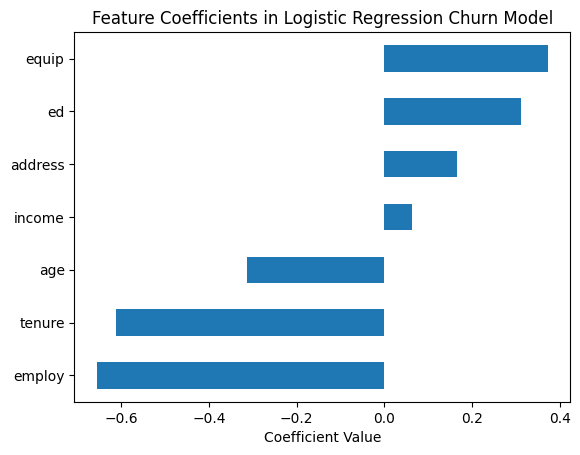

In [56]:
coeff = pd.Series(LR.coef_[0], index=df1.columns[:-1])
coeff.sort_values().plot(kind='barh')
plt.title('Feature Coefficients in Logistic Regression Churn Model')
plt.xlabel('Coefficient Value')
plt.show()

In [57]:
log_loss(Y_test, y_hat)

0.4068959657047867

In [58]:
df2 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard','churn']]
df2.head()

,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0


In [59]:
x = np.asarray(df2.drop('churn', axis=1))
y = np.asarray(df2['churn'])
x[0:5], y[0:5]

(array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
        [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
        [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
        [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
        [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.]]),
 array([1, 1, 0, 0, 0]))

In [64]:
x_scale = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

lr2 = LogisticRegression().fit(x_train, y_train)
y_pred = lr2.predict(x_test)
y_prob = lr2.predict_proba(x_test)
print(y_pred[0:5])
print(y_prob[0:5])

log_loss(y_test, y_prob)

[1 1 0 0 0]
[[0.46014508 0.53985492]
 [0.18152338 0.81847662]
 [0.81260363 0.18739637]
 [0.70499184 0.29500816]
 [0.76478748 0.23521252]]


0.37996228907763135

In [ ]:
df3 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]

x = np.asarray(df3.drop('churn', axis=1))
y = np.asarray(df3['churn'])

x_scale = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

lr3 = LogisticRegression().fit(x_train, y_train)
y_pred3 = lr3.predict(x_test)
y_prob3 = lr3.predict_proba(x_test)
print(y_pred3[0:5])
print(y_prob3[0:5])

log_loss(y_test, y_prob3)

[0 1 0 0 0]
[[0.58236732 0.41763268]
 [0.08907644 0.91092356]
 [0.85051256 0.14948744]
 [0.81222712 0.18777288]
 [0.74775455 0.25224545]]


0.4108752572895195

In [66]:
df4 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]

x = np.asarray(df4.drop('churn', axis=1))
y = np.asarray(df4['churn'])

x_scale = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

lr4 = LogisticRegression().fit(x_train, y_train)
y_pred4 = lr4.predict(x_test)
y_prob4 = lr4.predict_proba(x_test)
print(y_pred4[0:5])
print(y_prob4[0:5])

log_loss(y_test, y_prob4)

[0 1 0 0 0]
[[0.62879442 0.37120558]
 [0.16243237 0.83756763]
 [0.78880289 0.21119711]
 [0.75043418 0.24956582]
 [0.83475036 0.16524964]]


0.44225346132831034

In [67]:
df5 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]

x = np.asarray(df5.drop('churn', axis=1))
y = np.asarray(df5['churn'])

x_scale = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

lr5 = LogisticRegression().fit(x_train, y_train)
y_pred5 = lr5.predict(x_test)
y_prob5 = lr5.predict_proba(x_test)
print(y_pred5[0:5])
print(y_prob5[0:5])

log_loss(y_test, y_prob5)

[0 1 0 0 0]
[[0.61212825 0.38787175]
 [0.24595687 0.75404313]
 [0.76800818 0.23199182]
 [0.75477237 0.24522763]
 [0.81037798 0.18962202]]


0.4484697605424838

In [68]:
df6 = df[['tenure', 'age', 'address', 'ed', 'equip', 'churn']]

x = np.asarray(df6.drop('churn', axis=1))
y = np.asarray(df6['churn'])

x_scale = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

lr6 = LogisticRegression().fit(x_train, y_train)
y_pred6 = lr6.predict(x_test)
y_prob6 = lr6.predict_proba(x_test)
print(y_pred6[0:5])
print(y_prob6[0:5])

log_loss(y_test, y_prob6)

[0 1 0 0 0]
[[0.69211958 0.30788042]
 [0.22410487 0.77589513]
 [0.76133489 0.23866511]
 [0.84275728 0.15724272]
 [0.78704537 0.21295463]]


0.39325809237558584